In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns#数据可视化
from keras.models import Sequential#顺序建立神经网络
from keras.layers import Dense#连接层
from keras.optimizers import Adam#优化器
from keras.utils.np_utils import to_categorical#one-host编码
from keras.layers import Dropout, Flatten ,BatchNormalization , MaxPool2D#dropout正则化、压平、批量标准化、池化层
from keras.layers.convolutional import Conv2D#卷积层
from keras.preprocessing.image import ImageDataGenerator#预处理数据增强
from sklearn.model_selection import train_test_split
import os#路径问题

In [12]:
ds_train=pd.read_csv("train.csv")
ds_test=pd.read_csv("test.csv")

In [13]:
print("Train dataset :",ds_train.shape)
#print("Test dataset :",ds_test.shape)

Train dataset : (42000, 785)


In [14]:
X=ds_train.drop(['label'],axis=1)
y=ds_train['label']
print("done!")

done!


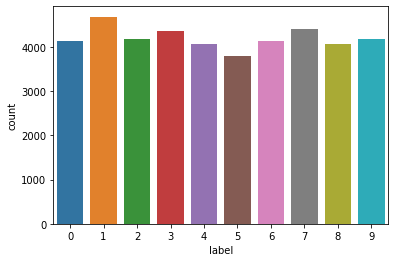

In [15]:
#查看数据分布
sns.countplot(y)

In [16]:
X=X/255.0
ds_test=ds_test/255.0

In [17]:
X = X.values.reshape(-1,28,28,1)
ds_test = ds_test.values.reshape(-1,28,28,1)

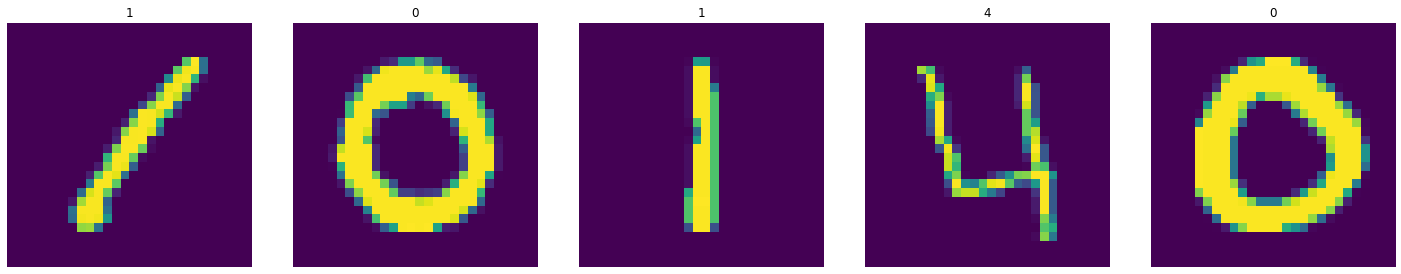

In [18]:
fig,axs=plt.subplots(1,5,figsize=(20,5))#画图，可删除
fig.tight_layout()#填充

for i in range(5):
    axs[i].imshow(X[i].reshape(28,28))
    axs[i].axis('off')
    axs[i].set_title(y[i])
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state=4)

In [20]:
len(X_train) #we will set batch size to 56 and step per epouch to 660

36960

In [21]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1, 
                            rotation_range=10)  
dataGen.fit(X_train)

In [22]:
batches= dataGen.flow(X_train,y_train,batch_size=20)#数据增强，批量数据大小为20，调32
X_batch,y_batch = next(batches)

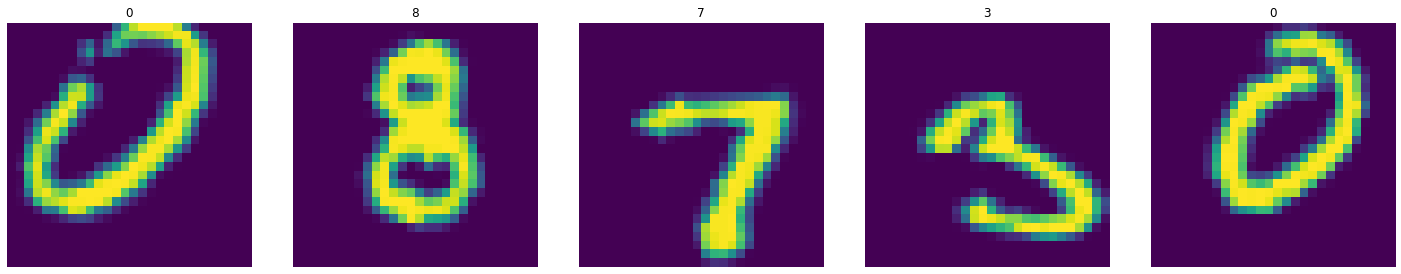

In [23]:
#画图，可删除
fig,axs=plt.subplots(1,5,figsize=(20,5))
fig.tight_layout()

for i in range(5):
    axs[i].imshow(X_batch[i].reshape(28,28))
    axs[i].axis('off')
    axs[i].set_title(y_batch[i])
plt.show()

In [24]:
#独热编码
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [25]:
model = Sequential()

#First
model.add(Conv2D(filters = 64, kernel_size = (3,3) ,activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 56, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))#取样
model.add(Dropout(0.2))

#Second
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 48, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third
model.add(Flatten())# 全连接层,展开操作，压平
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))

#Output
model.add(Dense(10, activation = "softmax"))


model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 56)        32312     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 56)        224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 56)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 56)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        32320     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 48)         

In [27]:
#you can set more than 10 epochs to get more accuracy 
history = model.fit_generator(dataGen.flow(X_train,y_train, batch_size=56),
                              epochs = 10, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=660)


# For 10 epochs we get 
#  loss: 0.0614 
#  accuracy: 0.9838 
#  val_loss: 0.0364 
#  val_accuracy: 0.9921

Epoch 1/10
 - 103s - loss: 0.5471 - accuracy: 0.8301 - val_loss: 0.0846 - val_accuracy: 0.9748
Epoch 2/10
 - 100s - loss: 0.1626 - accuracy: 0.9563 - val_loss: 0.0709 - val_accuracy: 0.9808
Epoch 3/10
 - 101s - loss: 0.1286 - accuracy: 0.9670 - val_loss: 0.0617 - val_accuracy: 0.9806
Epoch 4/10
 - 105s - loss: 0.1027 - accuracy: 0.9728 - val_loss: 0.0583 - val_accuracy: 0.9853
Epoch 5/10
 - 102s - loss: 0.0897 - accuracy: 0.9761 - val_loss: 0.0589 - val_accuracy: 0.9849
Epoch 6/10
 - 100s - loss: 0.0830 - accuracy: 0.9787 - val_loss: 0.0683 - val_accuracy: 0.9827
Epoch 7/10
 - 100s - loss: 0.0782 - accuracy: 0.9795 - val_loss: 0.0446 - val_accuracy: 0.9885
Epoch 8/10
 - 100s - loss: 0.0709 - accuracy: 0.9810 - val_loss: 0.0335 - val_accuracy: 0.9901
Epoch 9/10
 - 100s - loss: 0.0647 - accuracy: 0.9838 - val_loss: 0.0474 - val_accuracy: 0.9875
Epoch 10/10
 - 100s - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0494 - val_accuracy: 0.9875


Test Score: 0.04944147032953287
Test Accuracy: 0.987500011920929


<Figure size 432x288 with 0 Axes>

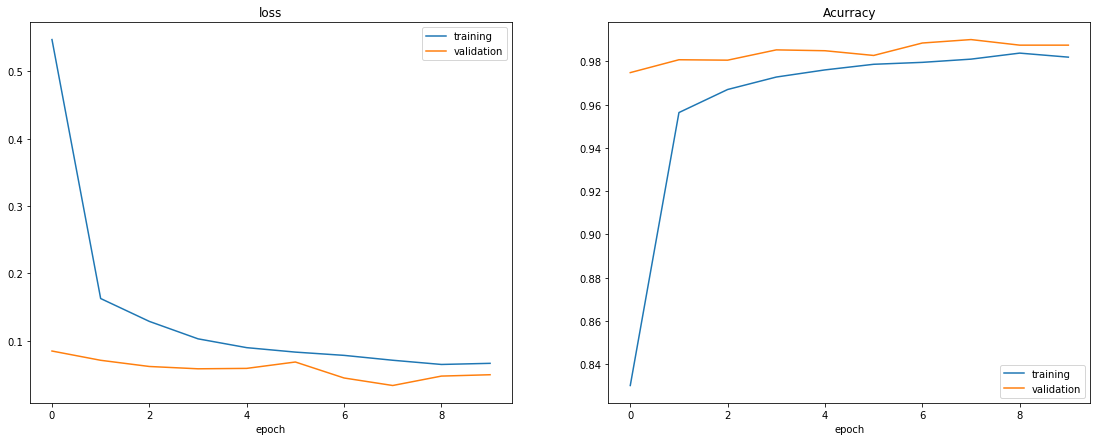

In [29]:
#画图
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epoch')



score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [30]:
results = model.predict(ds_test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("CNN_Digit_Recognizer_202006071506.csv",index=False)